# Single Asset Monte Carlo Simulation, using S&P 500 as an example

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
%matplotlib inline

### Read S&P 500 Price File

In [2]:
# Read file and index on date
sp500_df = pd.read_csv(Path('HistoricalQuotes_gspc.csv'), index_col=0, infer_datetime_format=True, parse_dates=True)

In [3]:
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,3223.330078,3225.649902,3216.030029,3221.219971,3221.219971,6454270000
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3060610000
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000
2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2428670000


In [4]:
# Drop irrelevant columns, keep close only
sp500_df = sp500_df[['Close']]
# Second option
# sp500_df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'], inplace=True)
sp500_df.head()

,Close
Date,
2019-12-20,3221.219971
2019-12-23,3224.010010
2019-12-24,3223.379883
2019-12-26,3239.909912
2019-12-27,3240.020020


In [5]:
sp500_df.tail()

,Close
Date,
2020-12-14,3647.489990
2020-12-15,3694.620117
2020-12-16,3701.169922
2020-12-17,3722.479980
2020-12-18,3709.409912


In [6]:
# Calculate daily returns
# sp500_df = sp500_df.sort_index(axis=0, ascending=False) - sample code to sort descending
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2019-12-20,NaN
2019-12-23,0.000866
2019-12-24,-0.000195
2019-12-26,0.005128
2019-12-27,0.000034


In [7]:
# Drop NAs
sp500_returns = sp500_returns.dropna()
sp500_returns.head()

,Close
Date,
2019-12-23,0.000866
2019-12-24,-0.000195
2019-12-26,0.005128
2019-12-27,0.000034
2019-12-30,-0.005781


In [8]:
sp500_returns.tail()

,Close
Date,
2020-12-14,-0.004359
2020-12-15,0.012921
2020-12-16,0.001773
2020-12-17,0.005758
2020-12-18,-0.003511


In [9]:
# Average daily return
sp500_avg_return = sp500_returns.mean().Close
sp500_avg_return

0.0008006280912802364

In [10]:
# Standard deviation
sp500_returns.Close.std()

0.021769329271760198

In [11]:
sp500_returns.describe()

,Close
count,251.000000
mean,0.000801
std,0.021769
min,-0.119841
25%,-0.006249
50%,0.002397
75%,0.010049
max,0.093828


In [12]:
sp500_stdev = sp500_returns.std()
sp500_stdev

Close    0.021769
dtype: float64

### Run the Monte Carlo Simulation and commit results to a DataFrame

In [13]:
# Set the number of trading days and use the last Close as the first input price as the first input variable into the model
num_trading_days = 252
sp500_last_close = sp500_df.Close[-1]

# Create a list to hold the simulated closing prices, with S&P last close being the first element in the list
simulated_sp500_prices = [sp500_last_close]

# Simulate the monte carlo return over the number of trading days, i.e. 252
for day in range(num_trading_days):
    # Monte carlo returns are simulated based on the last close, mean and standard deviation
    # Monte carlo uses the last price in the simulated close, applies standard deviation and mean to determine the next price, and so on....
    simulated_sp500_daily_close = simulated_sp500_prices[-1] * (1 + np.random.normal(sp500_avg_return, sp500_stdev))
    # Append the last price to the simulated close list
    x = simulated_sp500_prices.append(simulated_sp500_daily_close)
    
# Convert the simulated_sp500_close list to a dataframe
monte_carlo_sp500_close = pd.DataFrame({
    "S&P 500 Simulated Close": simulated_sp500_prices
})

# Display the head

#monte_carlo_sp500_close['S&P 500 Simulated Close'] = monte_carlo_sp500_close['S&P 500 Simulated Close'].str[0]

In [14]:
#monte_carlo_sp500_close['S&P 500 Simulated Close'].head()

In [15]:
monte_carlo_sp500_close.head() # output needs further cleaning in order to remove the square brackets

,S&P 500 Simulated Close
0,3709.41
1,[3731.8434546865365]
2,[3776.5539317172384]
3,[3839.788853987916]
4,[3839.270417988664]


In [16]:
df1 = monte_carlo_sp500_close.loc[[0]] # [[]] automatically makes df1 a dataframe; 

In [17]:
df1

,S&P 500 Simulated Close
0,3709.41


In [18]:
df2 = monte_carlo_sp500_close.loc[1:,]

In [19]:
df2.head()

,S&P 500 Simulated Close
1,[3731.8434546865365]
2,[3776.5539317172384]
3,[3839.788853987916]
4,[3839.270417988664]
5,[3805.7391848758853]


In [20]:
df2['S&P 500 Simulated Close'] = df2['S&P 500 Simulated Close'].str[0]

C:\Users\esuba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df2.head()

,S&P 500 Simulated Close
1,3731.843455
2,3776.553932
3,3839.788854
4,3839.270418
5,3805.739185


In [22]:
monte_carlo = df1.append(df2)

In [23]:
monte_carlo.head()

,S&P 500 Simulated Close
0,3709.41
1,3731.84
2,3776.55
3,3839.79
4,3839.27


In [24]:
monte_carlo.tail()

,S&P 500 Simulated Close
248,2563.23
249,2564.25
250,2575.79
251,2559.72
252,2467.62


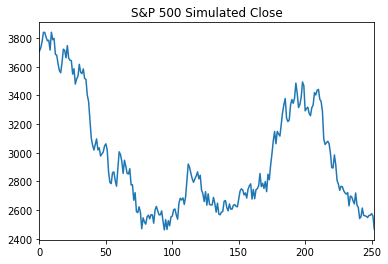

In [30]:
import hvplot.pandas
import matplotlib.pyplot as plt
monte_carlo['S&P 500 Simulated Close'].plot()
plt.title('S&P 500 Simulated Close')
plt.show()